In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
csv_file = "Tornadoes_SPC_1950to2015.csv"
df = pd.read_csv(csv_file)

df.head()


,om,yr,mo,dy,date,time,tz,st,stf,stn,...,fat,loss,closs,slat,slon,elat,elon,len,wid,fc
0,1,1950,1,3,1/3/1950,11:00:00,3,MO,29,1,...,0,6.0,0.0,38.77,-90.22,38.83,-90.03,9.5,150,0
1,2,1950,1,3,1/3/1950,11:55:00,3,IL,17,2,...,0,5.0,0.0,39.10,-89.30,39.12,-89.23,3.6,130,0
2,3,1950,1,3,1/3/1950,16:00:00,3,OH,39,1,...,0,4.0,0.0,40.88,-84.58,0.00,0.00,0.1,10,0
3,4,1950,1,13,1/13/1950,5:25:00,3,AR,5,1,...,1,3.0,0.0,34.40,-94.37,0.00,0.00,0.6,17,0
4,5,1950,1,25,1/25/1950,19:30:00,3,MO,29,2,...,0,5.0,0.0,37.60,-90.68,37.63,-90.65,2.3,300,0


In [4]:
df.columns

Index(['om', 'yr', 'mo', 'dy', 'date', 'time', 'tz', 'st', 'stf', 'stn', 'mag',
       'inj', 'fat', 'loss', 'closs', 'slat', 'slon', 'elat', 'elon', 'len',
       'wid', 'fc'],
      dtype='object')

In [5]:
new_df = df.loc[df.yr >= 1983, :]
new_df.head()

,om,yr,mo,dy,date,time,tz,st,stf,stn,...,fat,loss,closs,slat,slon,elat,elon,len,wid,fc
22878,1,1983,1,29,1/29/1983,22:15:00,3,FL,12,1,...,0,6.0,0.0,30.18,-85.80,0.00,0.00,0.7,30,0
22879,2,1983,1,31,1/31/1983,9:30:00,3,TX,48,1,...,0,5.0,0.0,29.40,-96.17,29.48,-96.15,5.0,60,0
22880,3,1983,1,31,1/31/1983,10:00:00,3,TX,48,2,...,0,6.0,0.0,30.17,-95.43,0.00,0.00,5.2,40,0
22881,4,1983,1,31,1/31/1983,10:15:00,3,TX,48,3,...,0,6.0,0.0,29.78,-96.13,29.83,-96.13,3.0,60,0
22882,5,1983,1,31,1/31/1983,13:07:00,3,TX,48,4,...,0,5.0,0.0,29.02,-95.95,0.00,0.00,1.0,20,0


In [ ]:
# new_df.dtypes
# df1 = new_df[[
# 'yr',
# 'mo',
# 'date',
# 'st',
# 'mag',
# 'inj',
# 'fat',
# 'loss',
# 'closs',
# 'len',
# 'wid',
# 'slat',
# 'slon',
# 'location']]
# df1.head()

In [6]:
df1 = df.copy()

df1.reset_index(inplace = True, drop = True)
df1.head()

,om,yr,mo,dy,date,time,tz,st,stf,stn,...,fat,loss,closs,slat,slon,elat,elon,len,wid,fc
0,1,1950,1,3,1/3/1950,11:00:00,3,MO,29,1,...,0,6.0,0.0,38.77,-90.22,38.83,-90.03,9.5,150,0
1,2,1950,1,3,1/3/1950,11:55:00,3,IL,17,2,...,0,5.0,0.0,39.10,-89.30,39.12,-89.23,3.6,130,0
2,3,1950,1,3,1/3/1950,16:00:00,3,OH,39,1,...,0,4.0,0.0,40.88,-84.58,0.00,0.00,0.1,10,0
3,4,1950,1,13,1/13/1950,5:25:00,3,AR,5,1,...,1,3.0,0.0,34.40,-94.37,0.00,0.00,0.6,17,0
4,5,1950,1,25,1/25/1950,19:30:00,3,MO,29,2,...,0,5.0,0.0,37.60,-90.68,37.63,-90.65,2.3,300,0


In [7]:
data = {'StName':['Alabama',
'Alaska',
'Arizona',
'Arkansas',
'California',
'Colorado',
'Connecticut',
'Delaware',
'Florida',
'Georgia',
'Hawaii',
'Idaho',
'Illinois',
'Indiana',
'Iowa',
'Kansas',
'Kentucky',
'Louisiana',
'Maine',
'Maryland',
'Massachusetts',
'Michigan',
'Minnesota',
'Mississippi',
'Missouri',
'Montana',
'Nebraska',
'Nevada',
'New Hampshire',
'New Jersey',
'New Mexico',
'New York',
'North Carolina',
'North Dakota',
'Ohio',
'Oklahoma',
'Oregon',
'Pennsylvania',
'Rhode Island',
'South Carolina',
'South Dakota',
'Tennessee',
'Texas',
'Utah',
'Vermont',
'Virginia',
'Washington',
'West Virginia',
'Wisconsin',
'Wyoming']}

df = pd.DataFrame(data)
cw_location = 'http://app02.clerk.org/menu/ccis/Help/CCIS%20Codes/'
cw_filename = 'state_codes.html'

states = pd.read_html(cw_location + cw_filename)[0]
state_code_map = dict(zip(states['Description'], 
                          states['Code']))
df['StAbbr'] = df['StName'].map(state_code_map)
code_state_map = dict(zip(states['Code'],
                          states['Description']))
df['StNameAgain'] = df['StAbbr'].map(code_state_map)
df
df = df.rename(columns={'stName': 'State_Name', 'StAbbr': 'st'})
df.head()

,StName,st,StNameAgain
0,Alabama,AL,Alabama
1,Alaska,AK,Alaska
2,Arizona,AZ,Arizona
3,Arkansas,AR,Arkansas
4,California,CA,California


In [8]:
new_df2 = pd.merge(df1, df, on='st', how='left')
new_df2.head()

# df3 = new_df2[[
# 'yr',
# 'mo',
# 'date',
# 'st',
# 'StName',
# 'mag',
# 'inj',
# 'fat',
# 'loss',
# 'closs',
# 'len',
# 'wid',
# 'slat',
# 'slon',
# 'location']]
# df3.head()

,om,yr,mo,dy,date,time,tz,st,stf,stn,...,closs,slat,slon,elat,elon,len,wid,fc,StName,StNameAgain
0,1,1950,1,3,1/3/1950,11:00:00,3,MO,29,1,...,0.0,38.77,-90.22,38.83,-90.03,9.5,150,0,Missouri,Missouri
1,2,1950,1,3,1/3/1950,11:55:00,3,IL,17,2,...,0.0,39.10,-89.30,39.12,-89.23,3.6,130,0,Illinois,Illinois
2,3,1950,1,3,1/3/1950,16:00:00,3,OH,39,1,...,0.0,40.88,-84.58,0.00,0.00,0.1,10,0,Ohio,Ohio
3,4,1950,1,13,1/13/1950,5:25:00,3,AR,5,1,...,0.0,34.40,-94.37,0.00,0.00,0.6,17,0,Arkansas,Arkansas
4,5,1950,1,25,1/25/1950,19:30:00,3,MO,29,2,...,0.0,37.60,-90.68,37.63,-90.65,2.3,300,0,Missouri,Missouri


In [10]:
df_clean = new_df2.copy()
df_clean["mag"].value_counts()

0    27933
1    20221
2     8924
3     2412
4      565
5       59
Name: mag, dtype: int64

In [11]:
df_clean['adjusted magnitude'] = df_clean['mag']
df_clean = df_clean.replace({'adjusted magnitude': {3: 2, 4: 2, 5:2}})
df_clean.head()

,om,yr,mo,dy,date,time,tz,st,stf,stn,...,slat,slon,elat,elon,len,wid,fc,StName,StNameAgain,adjusted magnitude
0,1,1950,1,3,1/3/1950,11:00:00,3,MO,29,1,...,38.77,-90.22,38.83,-90.03,9.5,150,0,Missouri,Missouri,2
1,2,1950,1,3,1/3/1950,11:55:00,3,IL,17,2,...,39.10,-89.30,39.12,-89.23,3.6,130,0,Illinois,Illinois,2
2,3,1950,1,3,1/3/1950,16:00:00,3,OH,39,1,...,40.88,-84.58,0.00,0.00,0.1,10,0,Ohio,Ohio,1
3,4,1950,1,13,1/13/1950,5:25:00,3,AR,5,1,...,34.40,-94.37,0.00,0.00,0.6,17,0,Arkansas,Arkansas,2
4,5,1950,1,25,1/25/1950,19:30:00,3,MO,29,2,...,37.60,-90.68,37.63,-90.65,2.3,300,0,Missouri,Missouri,2


In [ ]:
# # convet loss to whole numbers
# df_clean["loss"] = df_clean["loss"] * 1000000

In [12]:
# Add column totaling injuries and fatalities
df_clean["casualty"] = df_clean["inj"] + df_clean["fat"]
df_clean.head()

,om,yr,mo,dy,date,time,tz,st,stf,stn,...,slon,elat,elon,len,wid,fc,StName,StNameAgain,adjusted magnitude,casualty
0,1,1950,1,3,1/3/1950,11:00:00,3,MO,29,1,...,-90.22,38.83,-90.03,9.5,150,0,Missouri,Missouri,2,3
1,2,1950,1,3,1/3/1950,11:55:00,3,IL,17,2,...,-89.30,39.12,-89.23,3.6,130,0,Illinois,Illinois,2,3
2,3,1950,1,3,1/3/1950,16:00:00,3,OH,39,1,...,-84.58,0.00,0.00,0.1,10,0,Ohio,Ohio,1,1
3,4,1950,1,13,1/13/1950,5:25:00,3,AR,5,1,...,-94.37,0.00,0.00,0.6,17,0,Arkansas,Arkansas,2,2
4,5,1950,1,25,1/25/1950,19:30:00,3,MO,29,2,...,-90.68,37.63,-90.65,2.3,300,0,Missouri,Missouri,2,5


# Examine potential inputs

In [13]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60114 entries, 0 to 60113
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   om                  60114 non-null  int64  
 1   yr                  60114 non-null  int64  
 2   mo                  60114 non-null  int64  
 3   dy                  60114 non-null  int64  
 4   date                60114 non-null  object 
 5   time                60114 non-null  object 
 6   tz                  60114 non-null  int64  
 7   st                  60114 non-null  object 
 8   stf                 60114 non-null  int64  
 9   stn                 60114 non-null  int64  
 10  mag                 60114 non-null  int64  
 11  inj                 60114 non-null  int64  
 12  fat                 60114 non-null  int64  
 13  loss                60114 non-null  float64
 14  closs               60114 non-null  float64
 15  slat                60114 non-null  float64
 16  slon

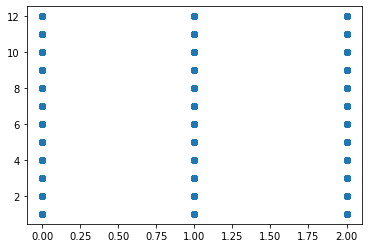

In [14]:
# scatter plot vs month - no trend - drop month
plt.scatter(df_clean["adjusted magnitude"], df_clean["mo"])

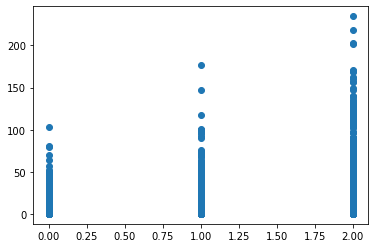

In [15]:
# scatter plot vs length - positive trend
plt.scatter(df_clean["adjusted magnitude"], df_clean["len"])

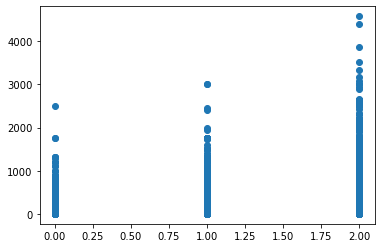

In [16]:
# scatter plot vs width - positive trend
plt.scatter(df_clean["adjusted magnitude"], df_clean["wid"])

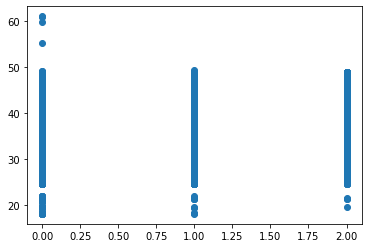

In [17]:
# scatter plot vs latitude - weak negative trend
plt.scatter(df_clean["adjusted magnitude"], df_clean["slat"])

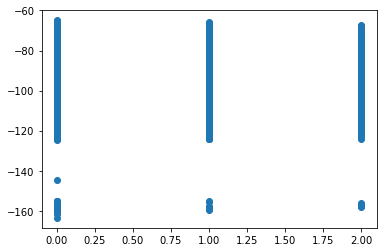

In [18]:
# scatter plot vs longitude - weak reverse trend
plt.scatter(df_clean["adjusted magnitude"], df_clean["slon"])

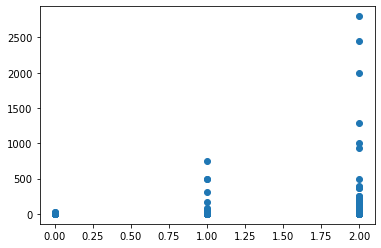

In [19]:
# scatter plot vs loss - positive trend
plt.scatter(df_clean["adjusted magnitude"], df_clean["loss"])

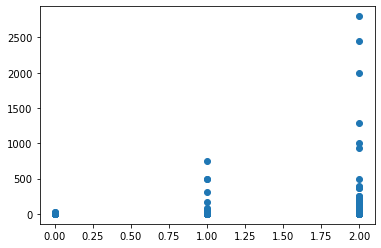

In [20]:
# scatter plot vs casualty - positive trend
plt.scatter(df_clean["adjusted magnitude"], df_clean["loss"])

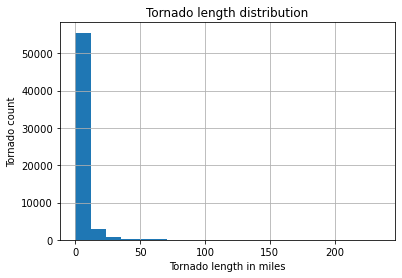

In [21]:
df_clean["len"].hist(bins=20, figsize=(6,4))
plt.title("Tornado length distribution")
plt.xlabel("Tornado length in miles")
plt.ylabel("Tornado count")
plt.show()

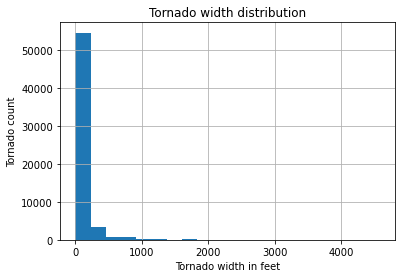

In [22]:
df_clean["wid"].hist(bins=20, figsize=(6,4))
plt.title("Tornado width distribution")
plt.xlabel("Tornado width in feet")
plt.ylabel("Tornado count")
plt.show()

In [23]:
# Average length by magnitude

groupEFscale = df_clean.groupby(by='adjusted magnitude')
groupEFscale['len'].mean()


adjusted magnitude
0    1.020364
1    3.197955
2    9.705043
Name: len, dtype: float64

In [24]:
# Average width by magnitude

groupEFscale['wid'].mean()

adjusted magnitude
0     41.561379
1     95.522922
2    236.287375
Name: wid, dtype: float64

In [25]:
# Average loss by mag

groupEFscale['loss'].mean()

adjusted magnitude
0    0.575817
1    2.332495
2    5.564819
Name: loss, dtype: float64

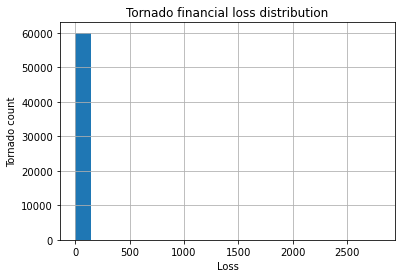

In [26]:
df_clean["loss"].hist(bins=20, figsize=(6,4))
plt.title("Tornado financial loss distribution")
plt.xlabel("Loss")
plt.ylabel("Tornado count")
plt.show()

In [27]:
# Average casualty by mag

groupEFscale['casualty'].mean()

adjusted magnitude
0    0.029857
1    0.355126
2    7.664214
Name: casualty, dtype: float64

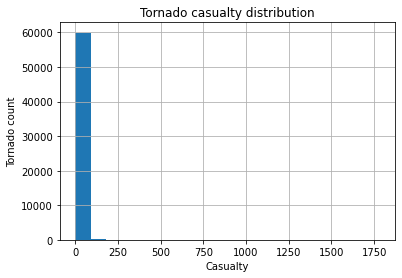

In [28]:
df_clean["casualty"].hist(bins=20, figsize=(6,4))
plt.title("Tornado casualty distribution")
plt.xlabel("Casualty")
plt.ylabel("Tornado count")
plt.show()

# Final cleaning and preparing test and training splits

In [29]:
df4 = df_clean[["mo","len", "wid", "slat", "slon", "loss", "casualty", "adjusted magnitude"]]
# df4.to_csv('tornado.csv', index = False, header=True)
df4.head()

,mo,len,wid,slat,slon,loss,casualty,adjusted magnitude
0,1,9.5,150,38.77,-90.22,6.0,3,2
1,1,3.6,130,39.10,-89.30,5.0,3,2
2,1,0.1,10,40.88,-84.58,4.0,1,1
3,1,0.6,17,34.40,-94.37,3.0,2,2
4,1,2.3,300,37.60,-90.68,5.0,5,2


/Users/seltsam/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


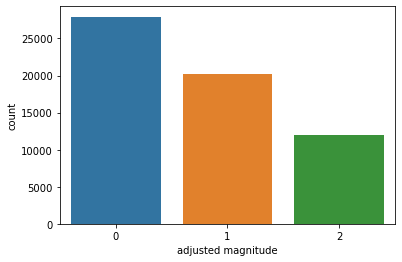

In [30]:

sns.countplot(df4["adjusted magnitude"], label="Count")
plt.show()

In [31]:
feature_names = ["len", "wid", "slat", "slon", "loss", "casualty"]
X = df4[feature_names]
y = df4['adjusted magnitude']
y

0        2
1        2
2        1
3        2
4        2
        ..
60109    1
60110    2
60111    1
60112    1
60113    0
Name: adjusted magnitude, Length: 60114, dtype: int64

In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [33]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Summary of models

```
Inputs: 
length, width, latitude, longitude, financial loss, causalties

Potential:
Decision Tree max depth 5 - moderate training, high testing 
Random Forest - possible overfitting problem (high training), but also high testing

Rejected:
Logistic Regression - data is not linear
Decision Tree - overfitting (high on training, low on testing)
K-nearest neighbor - low on testing
Linear Discriminant Analysis - data is not linear, low on training and testing
Gaussian Naive Bayes - low on testing and training
Support Vector Machine - low on testing and training
```

In [34]:
## Logistic Regression

# Our data is not linear - Reject model

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train_scaled, y_train)

print('Accuracy of logistic regression on training', logreg.score(X_train_scaled, y_train))
print('Accuracy of logistic regression on testing', logreg.score(X_test_scaled, y_test))

Accuracy of logistic regression on training 0.5833869357879561
Accuracy of logistic regression on testing 0.5849357908044447


/Users/seltsam/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [35]:
## Decision Tree - 

# high on training low on testing shows problem of overfitting - reject model

from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train_scaled, y_train)

print('Accuracy of Decision tree on training', dt.score(X_train_scaled, y_train))
print('Accuracy of Decision tree on testing', dt.score(X_test_scaled, y_test))

Accuracy of Decision tree on training 0.9992236885882222
Accuracy of Decision tree on testing 0.6260562911704038


In [36]:
# Setting max decision tree depth to help avoid overfitting

# Improved over previous - additional depth may improve

dt2 = DecisionTreeClassifier(max_depth=3)
dt2.fit(X_train_scaled, y_train)
print('Accuracy of Decision tree on training', dt2.score(X_train_scaled, y_train))
print('Accuracy of Decision tree on testing', dt2.score(X_test_scaled, y_test))

Accuracy of Decision tree on training 0.6430076522124876
Accuracy of Decision tree on testing 0.6404285048905449


In [45]:
# Decision tree - max depth 5

# Improved over previous - potential model

dt2 = DecisionTreeClassifier(max_depth=5)
dt2.fit(X_train_scaled, y_train)
print('Accuracy of Decision tree on training', dt2.score(X_train_scaled, y_train))
print('Accuracy of Decision tree on testing', dt2.score(X_test_scaled, y_test))

Accuracy of Decision tree on training 0.6821781080181879
Accuracy of Decision tree on testing 0.682014771441879


In [44]:
# K-nearest neighbor 

# Low on testing - rejected

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)
print('Accuracy of Knn on training', knn.score(X_train_scaled, y_train))
print('Accuracy of Knn on testing', knn.score(X_test_scaled, y_test))

Accuracy of Knn on training 0.7030941554840856
Accuracy of Knn on testing 0.5912569033202475


In [38]:
# Linear Discriminant Analysis 

# Our data is not linear, low on training and testing - rejected

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train_scaled,y_train)
print('Accuracy of Knn on training', lda.score(X_train_scaled, y_train))
print('Accuracy of Knn on testing', lda.score(X_test_scaled, y_test))

Accuracy of Knn on training 0.5429965620494621
Accuracy of Knn on testing 0.5493379466365028


In [39]:
# Gaussian Naive Bayes 

# low on testing and training - rejected

from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train_scaled, y_train)
print('Accuracy of GNB on training', gnb.score(X_train_scaled, y_train))
print('Accuracy of GNB on testing', gnb.score(X_test_scaled, y_test))

Accuracy of GNB on training 0.5878451813241654
Accuracy of GNB on testing 0.5912569033202475


In [40]:
# Support Vector Machine

# low on testing and training - rejected

from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train_scaled, y_train)
print('Accuracy of SVM on training', svm.score(X_train_scaled, y_train))
print('Accuracy of SVM on testing', svm.score(X_test_scaled, y_test))

Accuracy of SVM on training 0.5817455916601975
Accuracy of SVM on testing 0.5833388781688735


In [41]:
# Random Forest

# Possible verfitting problem, but high testing - potential

from sklearn.ensemble import RandomForestClassifier

# Create a random forest classifier

rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(X_train_scaled, y_train)

print('Accuracy of Random Forest on training', rf.score(X_train_scaled, y_train))
print('Accuracy of Random Forest on testing', rf.score(X_test_scaled, y_test))

Accuracy of Random Forest on training 0.9992236885882222
Accuracy of Random Forest on testing 0.7009781089892874


In [ ]:
import pickle

In [ ]:
pickle.dump(logreg, open('model.pkl','wb'))

In [ ]:
# Loading model to compare the results
model = pickle.load( open('model.pkl','rb'))
print(model.predict([[1,0.53,15,36.73,-119.86]]))
# print(model.predict([[1,5.75,40,34.70,-90.92]]))
# print(model.predict([[12,0.60,150,30.08,-90.54]]))


In [ ]:
## convert to geo data for mapping

from geojson import Feature, FeatureCollection, Point

features = new_df.apply(
    lambda row: Feature(geometry=Point((float(row['slon']), float(row['slat'])))),
    axis=1).tolist()

# all the other columns used as properties
properties = new_df.drop(['slon', 'slat'], axis=1).to_dict('records')

# whole geojson object
feature_collection = FeatureCollection(features=features, properties=properties)
feature_collection

In [ ]:
## convert to geo data for mapping

from geojson import Feature, FeatureCollection, Point

features = new_df.apply(
    lambda row: Feature(geometry=Point((float(row['slon']), float(row['slat'])))),
    axis=1).tolist()

# all the other columns used as properties
properties = new_df.drop(['slon', 'slat'], axis=1).to_dict('records')

# whole geojson object
feature_collection = FeatureCollection(features=features, properties=properties)
feature_collection

In [ ]:
df_groups = df3.groupby(['st']).sum()

In [ ]:
df_groups = df_groups.drop(columns=['yr','mag','closs','len','wid','slat','slon'])


In [ ]:
df_groups.sort_values(by="fat", ascending=False)
df_groups

In [ ]:
def df_to_geojson(df3, properties, lat='slat', lon='slon'):
    # create a new python dict to contain our geojson data, using geojson format
    geojson = {'type':'FeatureCollection', 'features':[]}
    # loop through each row in the dataframe and convert each row to geojson format
    for _, row in df3.iterrows():
        # create a feature template to fill in
        feature = {'type':'Feature',
                   'properties':{},
                   'geometry':{'type':'Point',
                               'coordinates':[]}}
        # fill in the coordinates
        feature['geometry']['coordinates'] = [row[lon],row[lat]]
        # for each column, get the value and add it as a new feature property
        for prop in properties:
            feature['properties'][prop] = row[prop]
        # add this feature (aka, converted dataframe row) to the list of features inside our dict
        geojson['features'].append(feature)
    return geojson

In [ ]:
cols = [
'yr',
'date',
'st',
'StName',
'mag',
'inj',
'fat',
'loss',
'closs',
'len',
'wid',
'slat',
'slon',
'location'
]
geojson = df_to_geojson(df3, cols)

In [ ]:
import IPython
IPython.display.display({'application/geo+json': geojson}, raw=True)

In [ ]:
geojson